## Data Science amb Python

**Estudiant**: Cristiane de Souza da Silva

### Lliurament tasca 6: Visualització gràfica d'un dataset


- **Exercici 1**

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights= pd.read_csv('DelayedFlights.csv')
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


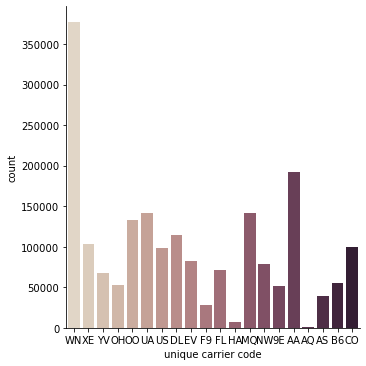

In [3]:
# A categorical variable (UniqueCarrier)
#plt.figure(figsize=(15,8))
sns.catplot(x="UniqueCarrier", kind="count", palette="ch:.25", data=flights)
plt.xlabel("unique carrier code")
plt.savefig('code_catplot.png')
plt.show()

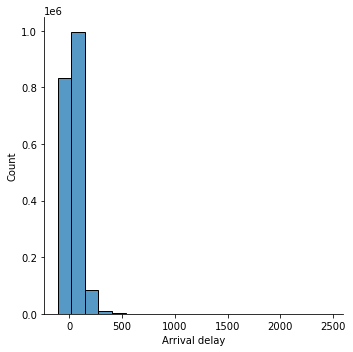

In [4]:
#A numeric variable (ArrDelay)

figsize=(12,8)
sns.displot(flights, x="ArrDelay", bins=20)
plt.xlabel("Arrival delay")
plt.savefig('arrdelay.png')
plt.show()

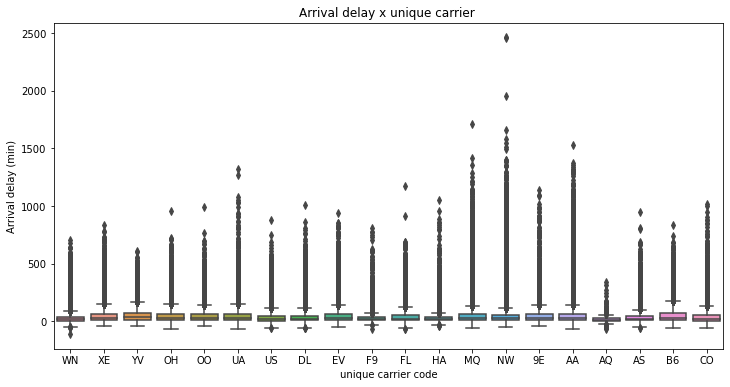

In [5]:
#A numeric and a categorical variable (ArrDelay and UniqueCarrier)
plt.figure(figsize=(12,6))
sns.boxplot(x="UniqueCarrier", y='ArrDelay',data=flights)
plt.xlabel("unique carrier code")
plt.ylabel('Arrival delay (min)')
plt.title('Arrival delay x unique carrier ')
plt.savefig('code-arrdelay.png')
plt.show()

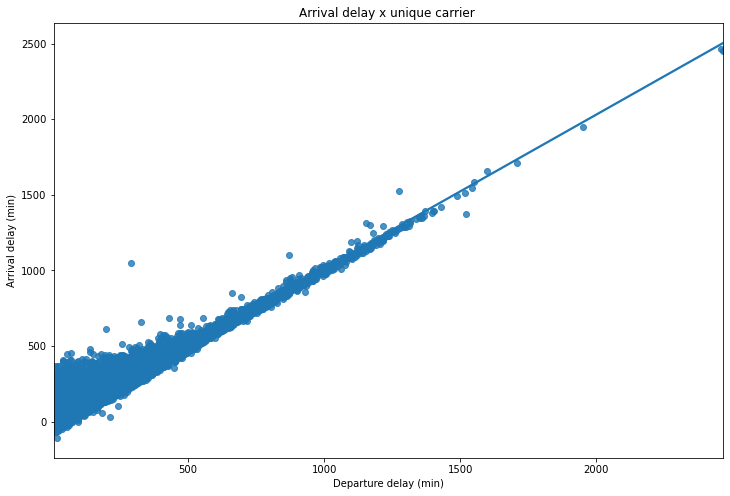

In [6]:
#Two numeric variables (ArrDelay and DepDelay)
plt.figure(figsize=(12,8))
sns.regplot(x="DepDelay", y="ArrDelay", data=flights)
plt.xlabel("Departure delay (min)")
plt.ylabel('Arrival delay (min)')
plt.title('Arrival delay x unique carrier ')
plt.savefig('arrdelay-depdelay.png')
plt.show()

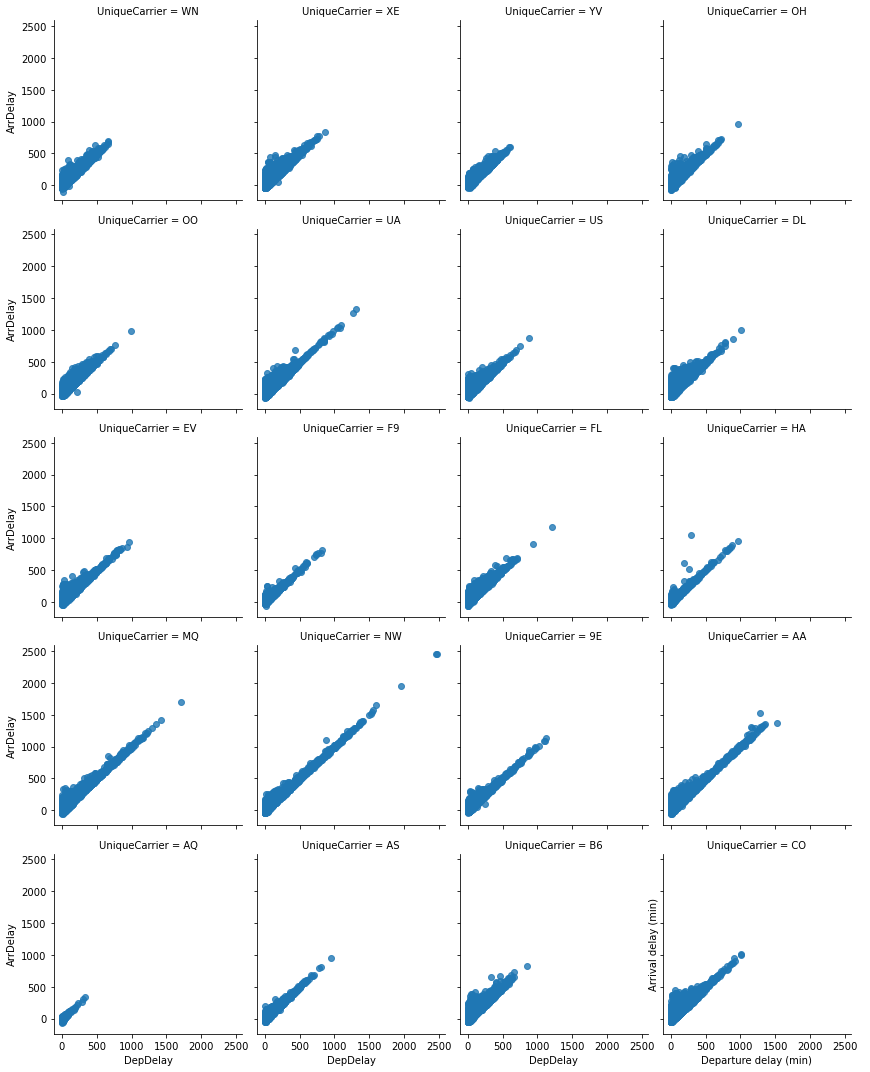

In [7]:
#Three variables (ArrDelay, DepDelay and UniqueCarrier)
#plt.figure(figsize=(12,8))

g = sns.FacetGrid(flights, col="UniqueCarrier", col_wrap=4)
g.map(sns.regplot, "DepDelay", "ArrDelay", fit_reg=False, x_jitter=.1)
g.add_legend()


plt.xlabel("Departure delay (min)")
plt.ylabel('Arrival delay (min)')
plt.savefig('code-arr-dep.png')
plt.show()

In [8]:
#More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).
four_variables = flights[['ArrDelay', 'DepDelay', 'AirTime' , 'UniqueCarrier']]
four_variables.head()

,ArrDelay,DepDelay,AirTime,UniqueCarrier
0,-14.0,8.0,116.0,WN
1,2.0,19.0,113.0,WN
2,14.0,8.0,76.0,WN
3,34.0,34.0,77.0,WN
4,11.0,25.0,87.0,WN


In [9]:
arrdelay_mean = four_variables.groupby(['UniqueCarrier'])['ArrDelay'].mean()
arrdelay_mean = arrdelay_mean.astype(int)
arrdelay_mean

UniqueCarrier
9E    46
AA    46
AQ    21
AS    36
B6    55
CO    40
DL    39
EV    47
F9    27
FL    43
HA    34
MQ    45
NW    43
OH    51
OO    45
UA    47
US    36
WN    30
XE    50
YV    55
Name: ArrDelay, dtype: int64

In [10]:
DepDelay_mean = four_variables.groupby(['UniqueCarrier'])['DepDelay'].mean()
DepDelay_mean = DepDelay_mean.astype(int)
DepDelay_mean

UniqueCarrier
9E    47
AA    46
AQ    26
AS    38
B6    55
CO    43
DL    39
EV    48
F9    27
FL    42
HA    33
MQ    43
NW    41
OH    48
OO    44
UA    49
US    38
WN    34
XE    50
YV    55
Name: DepDelay, dtype: int64

In [11]:
AirTime_mean = four_variables.groupby(['UniqueCarrier'])['AirTime'].mean()
AirTime_mean = AirTime_mean.astype(int)
AirTime_mean

UniqueCarrier
9E     72
AA    144
AQ    114
AS    129
B6    150
CO    165
DL    132
EV     72
F9    122
FL    104
HA    113
MQ     69
NW    115
OH     82
OO     71
UA    143
US    132
WN     93
XE     90
YV     65
Name: AirTime, dtype: int64

In [12]:
average_time_code= pd.concat([DepDelay_mean,AirTime_mean,arrdelay_mean], axis=1)
average_time_code

,DepDelay,AirTime,ArrDelay
UniqueCarrier,,,
9E,47,72,46
AA,46,144,46
AQ,26,114,21
AS,38,129,36
B6,55,150,55
CO,43,165,40
DL,39,132,39
EV,48,72,47
F9,27,122,27


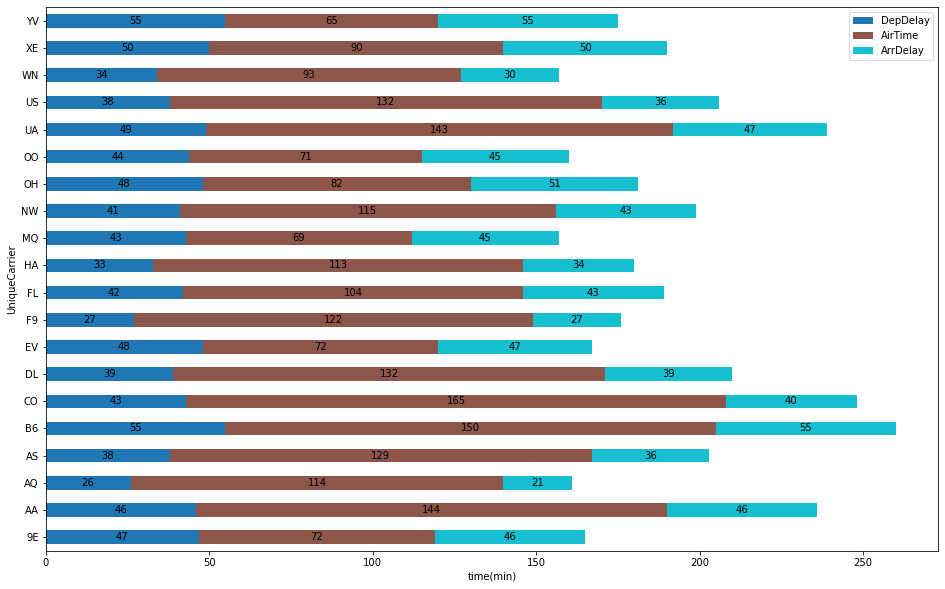

In [13]:
# plot 
ax = average_time_code.plot.barh(stacked=True, cmap='tab10', figsize=(16, 10))

# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.xlabel("time(min)");
plt.savefig('time-code.png')

- **Exercici 2**

Exporta els gràfics com imatges o com html.

- **Exercici 3**

Exporta el data set net i amb les noves columnes a Excel.

- **Exercici 4**

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.